# Predicting survival of Titanic Passengers
This notebook explores a dataset containing information of passengers of the Titanic.
The dataset can be downloaded from [Kaggle](https://www.kaggle.com/c/titanic/data)
## Tutorial goals
1. Explore the dataset
2. Build a simple predictive modeling
3. Iterate and improve your score
4. Optional: upload your prediction to Kaggle using the test dataset

How to follow along:

    git clone https://github.com/ghego/odsc_intro_to_data_science

    cd odsc_intro_to_data_science
    
    ipython notebook

We start by importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1) Explore the dataset

#### Numerical exploration

- Load the csv file into memory using Pandas
- Describe each attribute
    - is it discrete?
    - is it continuous?
    - is it a number?
    - is it text?
- Identify the target
- Check if any values are missing


Load the csv file into memory using Pandas

In [2]:
df = pd.read_csv('titanic-train.csv')

What's the content of ```df``` ?

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


Describe each attribute (is it discrete? is it continuous? is it a number? is it text?)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Is ```Pclass``` a continuous or discrete class?

In [5]:
df['Pclass'].value_counts()

3    491
1    216
2    184
dtype: int64

What about these: (```'SibSp', 'Parch'```)?

In [6]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

In [7]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
dtype: int64

and what about these: (```'Ticket', 'Fare', 'Cabin', 'Embarked'```)?

In [8]:
df[['Ticket', 'Fare', 'Cabin']].head(3)

,Ticket,Fare,Cabin
0,A/5 21171,7.2500,NaN
1,PC 17599,71.2833,C85
2,STON/O2. 3101282,7.9250,NaN


In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
dtype: int64

#### Identify the target
What are we trying to predict?

ah, yes... Survival!

In [10]:
df['Survived'].value_counts()

0    549
1    342
dtype: int64

Check if any values are missing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


#### Mental notes so far:

- Dataset contains 891 entries
- 1 Target column (```Survived```)
- 11 Features:
    - 6 numerical, 5 text
    - 1 useless (```PassengerId```)
    - 3 categorical (```Pclass, Sex, Embarked```)
    - 4 numerical, > 0 (```Age, SibSp, Parch, Fare```)
    - 3 not sure how to treat (```Name, Ticket, Cabin```)
- ```Age``` is only available for 714 passengers
- ```Cabin``` is only available for 204 passengers
- ```Embarked``` is missing for 2 passengers

#### Visual exploration

- plot the distribution of Age
- impute the missing values for Age using the median Age
- check the influence of Age, Sex and Class on Survival

Plot the distribution of Age

28.0

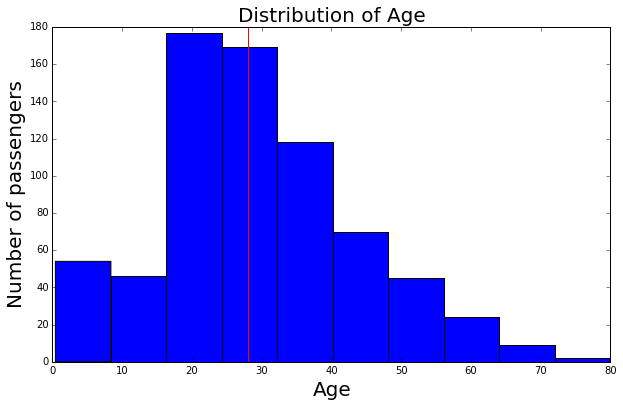

In [12]:
df['Age'].plot(kind='hist', figsize=(10,6))
plt.title('Distribution of Age', size = '20')
plt.xlabel('Age', size = '20')
plt.ylabel('Number of passengers', size = '20')
median_age = df['Age'].median()
plt.axvline(median_age, color = 'r')
median_age

impute the missing values for Age using the median Age

In [13]:
df['Age'].fillna(median_age, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


check the influence of Age

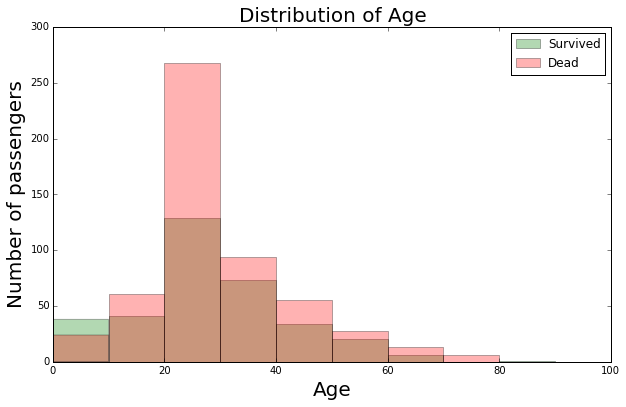

In [14]:
df[df['Survived']==1]['Age'].plot(kind='hist', bins = 10, range = (0,100), figsize=(10,6), alpha = 0.3, color = 'g')
df[df['Survived']==0]['Age'].plot(kind='hist', bins = 10, range = (0,100), figsize=(10,6), alpha = 0.3, color = 'r')
plt.title('Distribution of Age', size = '20')
plt.xlabel('Age', size = '20')
plt.ylabel('Number of passengers', size = '20')
plt.legend(['Survived', 'Dead'])
plt.show()

Check the influence of Sex on Survival

In [15]:
survival_by_gender = df[['Sex','Survived']].pivot_table(columns =
                        ['Survived'], index = ['Sex'], aggfunc=len)
survival_by_gender

Survived,0,1
Sex,,
female,81,233
male,468,109


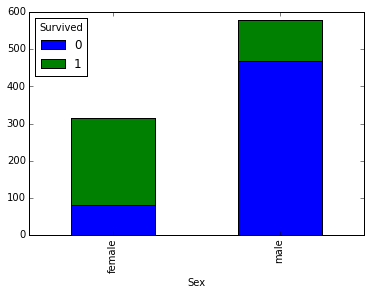

In [16]:
survival_by_gender.plot(kind = 'bar', stacked = True)
plt.show()

Check the influence of Sex on Survival

In [17]:
survival_by_Pclass = df[['Pclass','Survived']].pivot_table(columns =
                        ['Survived'], index = ['Pclass'], aggfunc=len)
survival_by_Pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


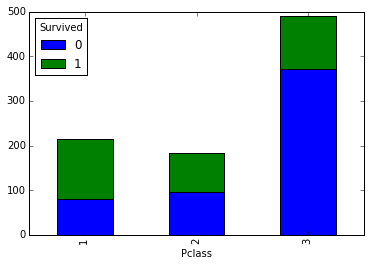

In [18]:
survival_by_Pclass.plot(kind = 'bar', stacked = True)
plt.show()

Ok, so, ```Age``` and ```Pclass``` seem to have some influence on survival rate.

Let's build a simple model to test that

Define a new feature called "Male" that is 1 if Sex = 'male' and 0 otherwise

In [19]:
df['Male'] = df['Sex'].map({'male': 1, 'female': 0})

Define simplest model as benchmark

The simplest model is a model that predicts 0 for everybody, i.e. no survival.

How good is it?

In [20]:
actual_dead = len(df[df['Survived'] == 0])
total_passengers = len(df)
ratio_of_dead = actual_dead / float(total_passengers)

print "If I predict everybody dies, I'm correct %0.1f %% of the time" % (100 * ratio_of_dead)


If I predict everybody dies, I'm correct 61.6 % of the time


We need to do better than that

Define features (X) and target (y) variables

In [21]:
X = df[['Male', 'Pclass', 'Age']]
y = df['Survived']

Initialize a decision tree model

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

 Split the features and the target into a Train and a Test subsets.
 
 Ratio should be 80/20

In [23]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.2, random_state=0)

Train the model

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

Calculate the model score

In [25]:
my_score = model.score(X_test, y_test)

print "Classification Score: %0.2f" % my_score

Classification Score: 0.82


Print the confusion matrix for the decision tree model

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print "\n=======confusion matrix=========="
print confusion_matrix(y_test, y_pred)


=======confusion matrix==========
[[97 13]
 [20 49]]


### 3) Iterate and improve

Now you have a basic pipeline. How can you improve the score? Try:
- adding new features
- changing the parameters of the model
- changing the model itself

Let's have a small competition....

### 4) Optional: upload your prediction to Kaggle using the test dataset